In [44]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
pd.set_option('display.max_rows', None)

In [24]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Nicole')

In [25]:
df = pd.read_csv('EFI_and_GGEI_scores.csv')

In [26]:
df = df[['country', 'economic_freedom_score', 'ggei_score']]

In [27]:
df.head()

,country,economic_freedom_score,ggei_score
0,Switzerland,81.7,75.94
1,Sweden,76.3,76.08
2,Singapore,88.8,61.54
3,Iceland,77.0,71.29
4,Norway,74.3,70.31


In [28]:
X = df.iloc[:, [1, 2]].values

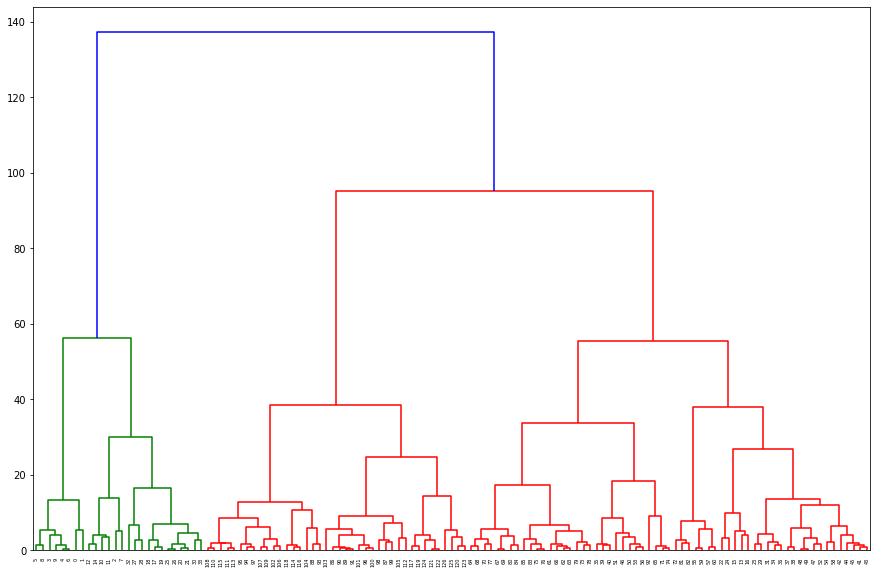

In [12]:
plt.figure(figsize = (15, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'));

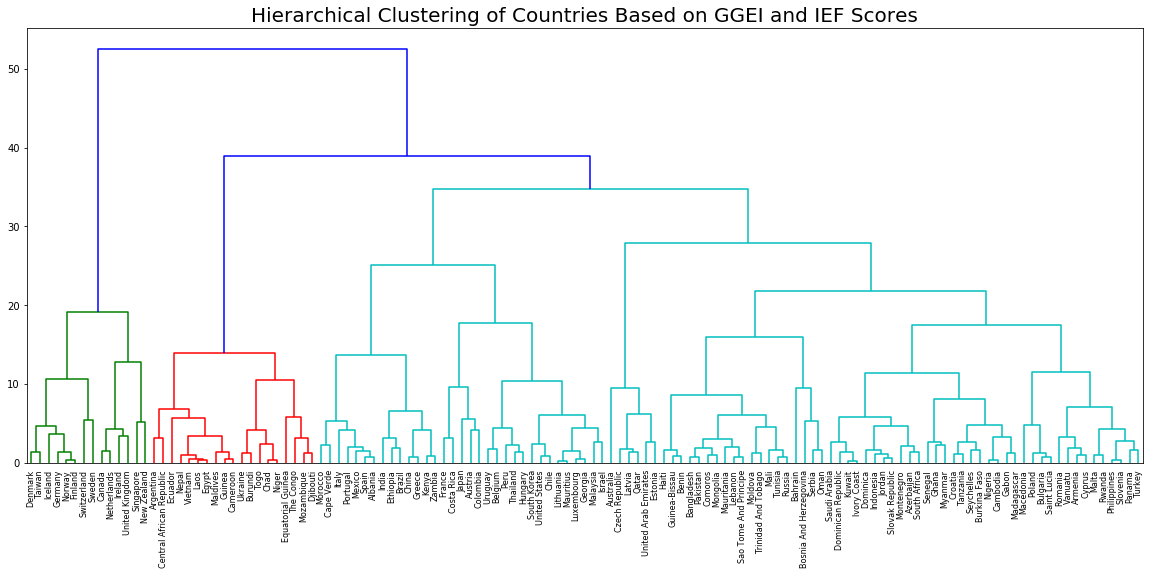

In [37]:
# Calculate the linkage: mergings
mergings = linkage(X, method = 'complete')
country_names = list(df['country'])

# Plot the dendrogram, using varieties as labels
plt.figure(figsize = (20, 8))
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size = 8)
plt.title('Hierarchical Clustering of Countries Based on GGEI and IEF Scores', fontsize = 20);

In [46]:
#get cluster labels based on height of dendrogram, we want four clusters, so we will go with 30 height on the y axis (you can see how the data is split
# into 4 clusters at that height)
labels = fcluster(mergings, 30, criterion = 'distance')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 2, 4,
       4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Final Cluster Labels

In [47]:
#inspect the countries and their corresponding cluster labels in a dataframe
pairs = pd.DataFrame({'labels':labels, 'countries':country_names})
pairs.sort_values('labels').reset_index(drop = True)

,labels,countries
0,1,Switzerland
1,1,Netherlands
2,1,Canada
3,1,United Kingdom
4,1,Germany
5,1,Taiwan
6,1,New Zealand
7,1,Ireland
8,1,Denmark
9,1,Norway
